HW1 - 3. Implement a genetic algorithm to solve the 50-bit OneMax problem and plot the fitness for 10 runs of 100 generations each.

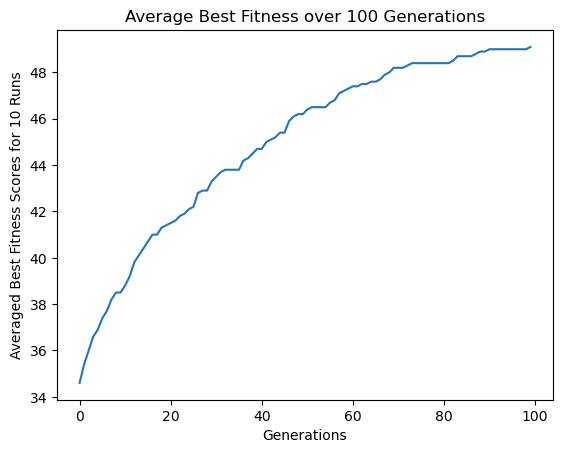

In [3]:
# genetic algorithm search of the one max optimization problem
from numpy.random import randint
from numpy.random import rand
import numpy as np
import matplotlib.pyplot as plt

# objective function
def onemax(x):
    return -sum(x)

# tournament selection
def tournament_selection(pop, scores, k=3):
    # first random selection
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), k-1):
        # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

def roulette_wheel_selection(pop, scores):
    total_score = sum(scores)
    prob = [np.abs(s/total_score) for s in scores]
    select_i = np.random.choice(range(len(pop)), p=prob)
    return pop[select_i]

# crossover two parents to create two children
def crossover(p1, p2, r_cross):
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
    # check for recombination
    if rand() < r_cross:
        # select crossover point that is not on the end of the string
        pt = randint(1, len(p1)-2)
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

# mutation operator
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        # check for a mutation
        if rand() < r_mut:
            # flip the bit
            bitstring[i] = 1 - bitstring[i]

# genetic algorithm
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut, mutation=True):
    fitness_tracker = list()
    # initial population of random bitstring
    pop = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
    # keep track of best solution
    best, best_eval = 0, objective(pop[0])
    # enumerate generations
    for gen in range(n_iter):
        # evaluate all candidates in the population
        scores = [objective(c) for c in pop]
        # check for new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                #print(">%d, new best f(%s) = %.3f" % (gen,  pop[i], scores[i]))
        fitness_tracker.append(best_eval)
        # select parents
        #selected = [tournament_selection(pop, scores) for _ in range(n_pop)]
        selected = [roulette_wheel_selection(pop, scores) for _ in range(n_pop)]

        # create the next generation
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                if mutation:
                    mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace population
        pop = children
    return best, best_eval, fitness_tracker

# define the total iterations
n_iter = 100
# bits
n_bits = 50
# define the population size
n_pop = 200
# crossover rate
r_cross = 1
# mutation rate
r_mut = 0#1.0 / float(n_bits)
# perform the genetic algorithm search
fitness_global = list()
n_runs = 10
for r in range(n_runs):
    best, score, fitness_story = genetic_algorithm(onemax, n_bits, n_iter, n_pop, r_cross, r_mut, mutation=False)
    #print('Done!')
    #print('f(%s) = %f' % (best, score))
    fitness_global.append(fitness_story)

y = np.abs(np.average(fitness_global, axis=0))
plt.plot(y)
plt.xlabel("Generations")
plt.ylabel("Averaged Best Fitness Scores for 10 Runs")
plt.title("Average Best Fitness over 100 Generations")
plt.show()


HW1 - 4. Repeat the problem above with a modification to the fitness function. 

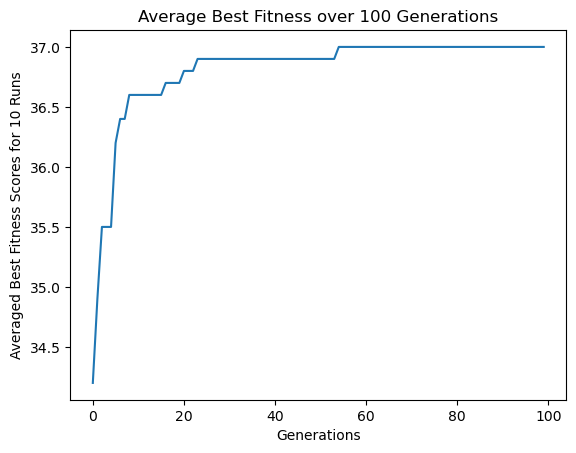

In [5]:
# genetic algorithm search of the one max optimization problem
from numpy.random import randint
from numpy.random import rand
import numpy as np
import matplotlib.pyplot as plt

# objective function
def onemax(x):
    return -(sum(x) + 1000)

# tournament selection
def tournament_selection(pop, scores, k=3):
    # first random selection
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), k-1):
        # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

def roulette_wheel_selection(pop, scores):
    total_score = sum(scores)
    prob = [np.abs(s/total_score) for s in scores]
    select_i = np.random.choice(range(len(pop)), p=prob)
    return pop[select_i]

# crossover two parents to create two children
def crossover(p1, p2, r_cross):
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
    # check for recombination
    if rand() < r_cross:
        # select crossover point that is not on the end of the string
        pt = randint(1, len(p1)-2)
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

# mutation operator
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        # check for a mutation
        if rand() < r_mut:
            # flip the bit
            bitstring[i] = 1 - bitstring[i]

# genetic algorithm
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut, mutation=True):
    fitness_tracker = list()
    # initial population of random bitstring
    pop = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
    # keep track of best solution
    best, best_eval = 0, objective(pop[0])
    # enumerate generations
    for gen in range(n_iter):
        # evaluate all candidates in the population
        scores = [objective(c) for c in pop]
        # check for new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                #print(">%d, new best f(%s) = %.3f" % (gen,  pop[i], scores[i]))
        fitness_tracker.append(best_eval)
        # select parents
        #selected = [tournament_selection(pop, scores) for _ in range(n_pop)]
        selected = [roulette_wheel_selection(pop, scores) for _ in range(n_pop)]

        # create the next generation
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                if mutation:
                    mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace population
        pop = children
    return best, best_eval, fitness_tracker

# define the total iterations
n_iter = 100
# bits
n_bits = 50
# define the population size
n_pop = 200
# crossover rate
r_cross = 1
# mutation rate
r_mut = 0#1.0 / float(n_bits)
# perform the genetic algorithm search
fitness_global = list()
n_runs = 10
for r in range(n_runs):
    best, score, fitness_story = genetic_algorithm(onemax, n_bits, n_iter, n_pop, r_cross, r_mut, mutation=False)
    #print('Done!')
    #print('f(%s) = %f' % (best, score))
    fitness_global.append(np.array(fitness_story)+1000)  # remove 1000 because of the fitness function

y = np.abs(np.average(fitness_global, axis=0))
plt.plot(y)
plt.xlabel("Generations")
plt.ylabel("Averaged Best Fitness Scores for 10 Runs")
plt.title("Average Best Fitness over 100 Generations")
plt.show()


HW1 - 5. Compare the results you got for problems 3 and 4. Discuss the difference. 

-> The modification of the loss function reduces the effectivness of the genetic algorithm. This is due to the fact that the roulette wheel selection selects parents with the probability based on their evaluated fitness score divided by the total fitness score of the population. Since the fitness score with the modified loss function is in absolute terms greater, it does not highlight the fitter genotypes enough, thus being less effective in selecting the fittest parents. E.g. compare fitness score -1032 vs -32 when the total fitness score sums are -204985 and -1985 respectively (= 0.00503 vs 0.01612). 

HW1 - 6. Repeat problem 3 using tournament selection with replacement instead of roulette wheel selection. Tournament size = 2.

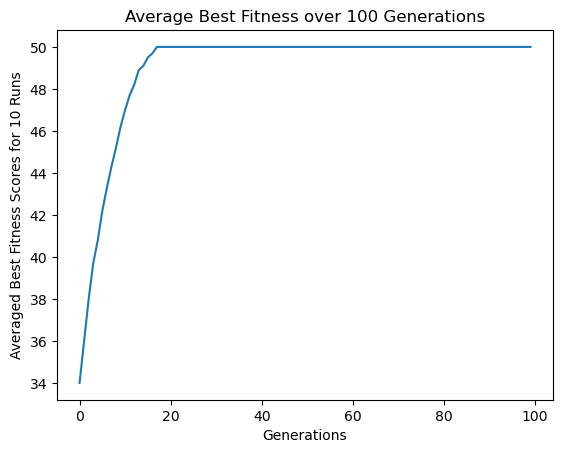

In [7]:
# genetic algorithm search of the one max optimization problem
from numpy.random import randint
from numpy.random import rand
import numpy as np
import matplotlib.pyplot as plt

# objective function
def onemax(x):
    return -sum(x)

# tournament selection
def tournament_selection(pop, scores, k=2):
    # first random selection
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), k):
        # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

def roulette_wheel_selection(pop, scores):
    total_score = sum(scores)
    prob = [np.abs(s/total_score) for s in scores]
    select_i = np.random.choice(range(len(pop)), p=prob)
    return pop[select_i]

# crossover two parents to create two children
def crossover(p1, p2, r_cross):
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
    # check for recombination
    if rand() < r_cross:
        # select crossover point that is not on the end of the string
        pt = randint(1, len(p1)-2)
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

# mutation operator
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        # check for a mutation
        if rand() < r_mut:
            # flip the bit
            bitstring[i] = 1 - bitstring[i]

# genetic algorithm
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut, mutation=True):
    fitness_tracker = list()
    # initial population of random bitstring
    pop = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
    # keep track of best solution
    best, best_eval = 0, objective(pop[0])
    # enumerate generations
    for gen in range(n_iter):
        # evaluate all candidates in the population
        scores = [objective(c) for c in pop]
        # check for new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                #print(">%d, new best f(%s) = %.3f" % (gen,  pop[i], scores[i]))
        fitness_tracker.append(best_eval)
        # select parents
        selected = [tournament_selection(pop, scores) for _ in range(n_pop)]
        #selected = [roulette_wheel_selection(pop, scores) for _ in range(n_pop)]

        # create the next generation
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                if mutation:
                    mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace population
        pop = children
    return best, best_eval, fitness_tracker

# define the total iterations
n_iter = 100
# bits
n_bits = 50
# define the population size
n_pop = 200
# crossover rate
r_cross = 1
# mutation rate
r_mut = 0#1.0 / float(n_bits)
# perform the genetic algorithm search
fitness_global = list()
n_runs = 10
for r in range(n_runs):
    best, score, fitness_story = genetic_algorithm(onemax, n_bits, n_iter, n_pop, r_cross, r_mut, mutation=False)
    #print('Done!')
    #print('f(%s) = %f' % (best, score))
    fitness_global.append(np.array(fitness_story))

y = np.abs(np.average(fitness_global, axis=0))
plt.plot(y)
plt.xlabel("Generations")
plt.ylabel("Averaged Best Fitness Scores for 10 Runs")
plt.title("Average Best Fitness over 100 Generations")
plt.show()


HW1 - 7. Repeat problem 4 using tournament selection with replacement instead of roulette wheel selection. Tournament size = 2. 


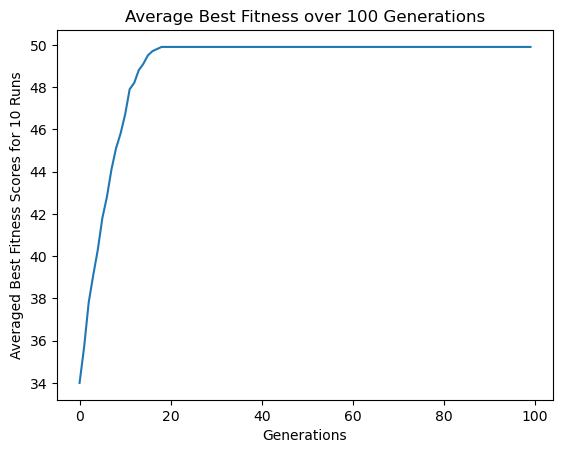

In [8]:
# genetic algorithm search of the one max optimization problem
from numpy.random import randint
from numpy.random import rand
import numpy as np
import matplotlib.pyplot as plt

# objective function
def onemax(x):
    return -(sum(x) + 1000)

# tournament selection
def tournament_selection(pop, scores, k=2):
    # first random selection
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), k):
        # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

def roulette_wheel_selection(pop, scores):
    total_score = sum(scores)
    prob = [np.abs(s/total_score) for s in scores]
    select_i = np.random.choice(range(len(pop)), p=prob)
    return pop[select_i]

# crossover two parents to create two children
def crossover(p1, p2, r_cross):
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
    # check for recombination
    if rand() < r_cross:
        # select crossover point that is not on the end of the string
        pt = randint(1, len(p1)-2)
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

# mutation operator
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        # check for a mutation
        if rand() < r_mut:
            # flip the bit
            bitstring[i] = 1 - bitstring[i]

# genetic algorithm
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut, mutation=True):
    fitness_tracker = list()
    # initial population of random bitstring
    pop = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
    # keep track of best solution
    best, best_eval = 0, objective(pop[0])
    # enumerate generations
    for gen in range(n_iter):
        # evaluate all candidates in the population
        scores = [objective(c) for c in pop]
        # check for new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                #print(">%d, new best f(%s) = %.3f" % (gen,  pop[i], scores[i]))
        fitness_tracker.append(best_eval)
        # select parents
        selected = [tournament_selection(pop, scores) for _ in range(n_pop)]
        #selected = [roulette_wheel_selection(pop, scores) for _ in range(n_pop)]

        # create the next generation
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                if mutation:
                    mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace population
        pop = children
    return best, best_eval, fitness_tracker

# define the total iterations
n_iter = 100
# bits
n_bits = 50
# define the population size
n_pop = 200
# crossover rate
r_cross = 1
# mutation rate
r_mut = 0#1.0 / float(n_bits)
# perform the genetic algorithm search
fitness_global = list()
n_runs = 10
for r in range(n_runs):
    best, score, fitness_story = genetic_algorithm(onemax, n_bits, n_iter, n_pop, r_cross, r_mut, mutation=False)
    #print('Done!')
    #print('f(%s) = %f' % (best, score))
    fitness_global.append(np.array(fitness_story)+1000)  # remove 1000 because of the fitness function

y = np.abs(np.average(fitness_global, axis=0))
plt.plot(y)
plt.xlabel("Generations")
plt.ylabel("Averaged Best Fitness Scores for 10 Runs")
plt.title("Average Best Fitness over 100 Generations")
plt.show()


HW1 - 8. Compare the results and plots you got for problems 6 and 7. 

-> As previously discussed, modifying the loss function leads to a decrease of performance of the roulette wheel selection since it operates with the probabilities calculated from the fitness of one individual compared to the total fitness of the population. Problems 6 and 7 show almost identical results (and a faster convergence) since the tournament selection is used instead which compares the fitness of the individuals directly, and not based on probability. 

HW1 - 9. Compare the results and plots you got for problemd 3,4,6, 7. 

-> By observing the plots we can conclude that the tournament selection delivers better results for this particular optimization problem because it converges much faster and that it tends to be more robust regarding the formulation of the loss function, as it evaluates evaluates directly by their fitness without calculating any probabilities. 